In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [11]:
df['director'] = df['director'].fillna('unknown')
df['director'].isnull().sum()


0

In [12]:
df['cast'] = df['cast'].fillna('unknown')
df['cast'].isnull().sum()

0

In [13]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df['country'] = df['country'].apply(lambda x:x.capitalize())
df['country'].head()

0    United states
1     South africa
2          Unknown
3          Unknown
4            India
Name: country, dtype: object

In [16]:
df[['date_added','release_year']]

,date_added,release_year
0,"September 25, 2021",2020
1,"September 24, 2021",2021
2,"September 24, 2021",2021
3,"September 24, 2021",2021
4,"September 24, 2021",2021
...,...,...
8802,"November 20, 2019",2007
8803,"July 1, 2019",2018
8804,"November 1, 2019",2009
8805,"January 11, 2020",2006


In [17]:
df['added_month'] = df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
df['added_year'] = df['date_added'].apply(lambda x:x.split(',')[1])
df[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [18]:
df.drop('date_added', axis=1, inplace = True)
df['added_year'] = df['added_year'].astype(int)

In [19]:
df.drop(df[df['added_year']<df['release_year']].index, inplace=True)

In [20]:
df.shape

(8776, 13)

In [21]:
df['type'].nunique()

2

In [22]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      6124
TV Show    2652
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

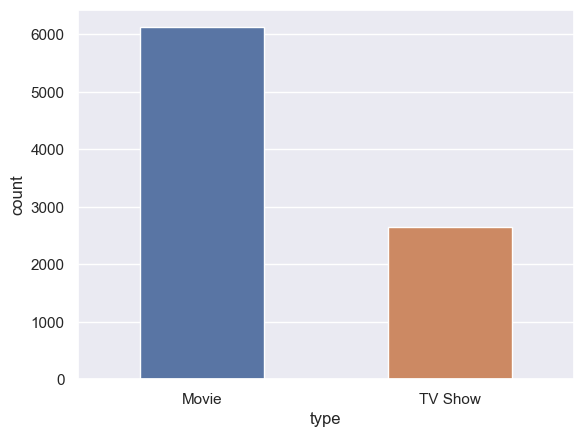

In [23]:
sns.countplot(x = df['type'],width=0.5)

In [24]:
print(f'On Netflix,{round((type_counts[0]/type_counts.sum())*100,2)}% are Movie and {round((type_counts[1]/type_counts.sum())*100,2)}% are TV show')


On Netflix,69.78% are Movie and 30.22% are TV show


C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\822230120.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'On Netflix,{round((type_counts[0]/type_counts.sum())*100,2)}% are Movie and {round((type_counts[1]/type_counts.sum())*100,2)}% are TV show')


In [25]:
df['director'].nunique()

4524

In [26]:
director_counts = df['director'].value_counts()
director_counts

director
unknown                           2610
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4524, dtype: int64

In [28]:
df['country'].nunique()


746

In [29]:

country_counts = df['country'].value_counts()
country_counts

country
United states                             2803
India                                      972
Unknown                                    829
United kingdom                             418
Japan                                      243
                                          ... 
Romania, bulgaria, hungary                   1
Uruguay, guatemala                           1
France, senegal, belgium                     1
Mexico, united states, spain, colombia       1
United arab emirates, jordan                 1
Name: count, Length: 746, dtype: int64

<Axes: xlabel='country', ylabel='count'>

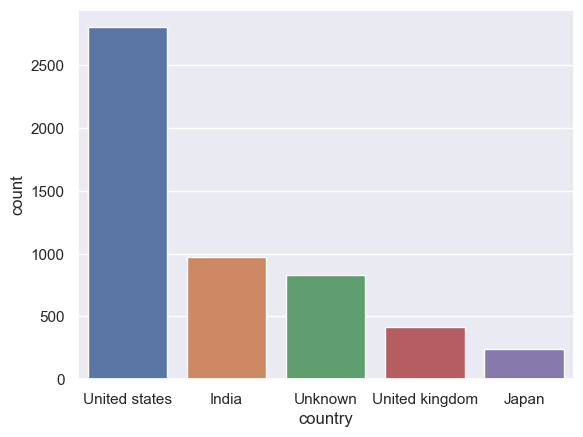

In [31]:
top_countries = country_counts.nlargest(5)
top_countries
sns.countplot(x  = df['country'], order = top_countries.index)

In [32]:
df['added_year'].nunique()


14

In [33]:

df['added_year'].value_counts()

added_year
2019    2012
2020    1876
2018    1645
2021    1498
2017    1184
2016     424
2015      82
2014      24
2011      13
2013      10
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

<Axes: xlabel='added_year', ylabel='count'>

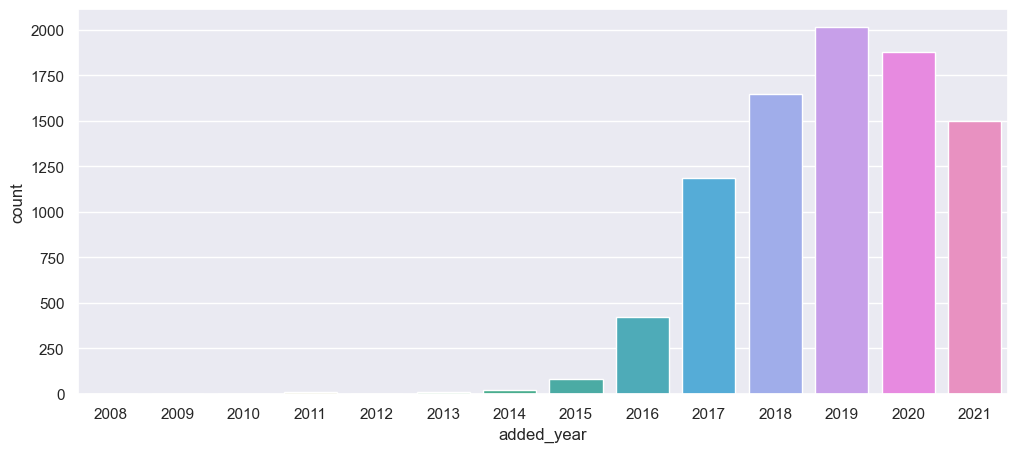

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['added_year'])

In [35]:
df['added_month'].nunique()

12

In [36]:
df['added_month'].value_counts()

added_month
July         826
December     808
September    769
April        763
October      757
August       754
March        740
January      737
June         728
November     703
May          630
February     561
Name: count, dtype: int64

<Axes: xlabel='added_month', ylabel='count'>

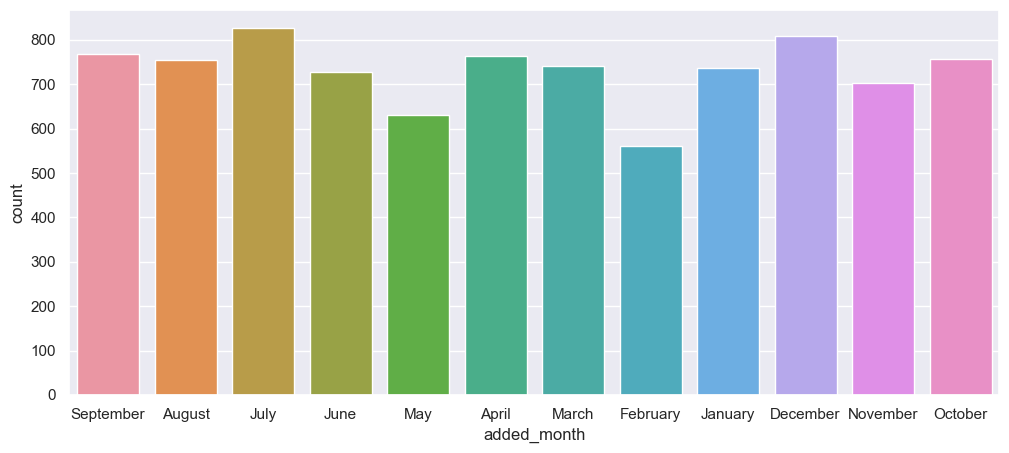

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['added_month'])

In [38]:
df['rating'].nunique()

14

In [41]:
df['rating'].value_counts(normalize=True)

rating
TV-MA       36.406108
TV-14       24.567001
TV-PG        9.799453
R            9.104376
PG-13        5.583409
TV-Y7        3.783045
TV-Y         3.475387
PG           3.270283
TV-G         2.506837
NR           0.900182
G            0.467183
TV-Y7-FV     0.068368
NC-17        0.034184
UR           0.034184
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='rating'>

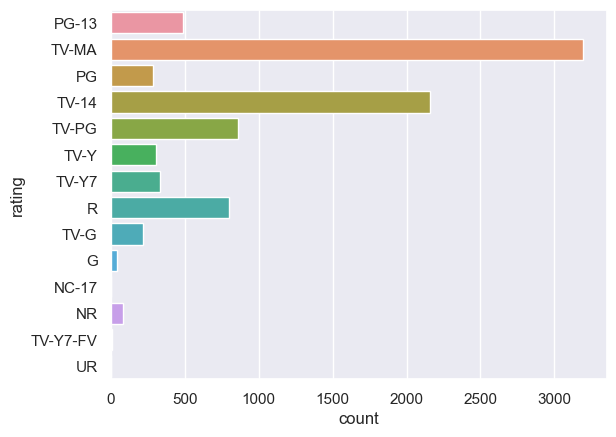

In [40]:
sns.countplot(y = df['rating'])

<Axes: xlabel='country', ylabel='count'>

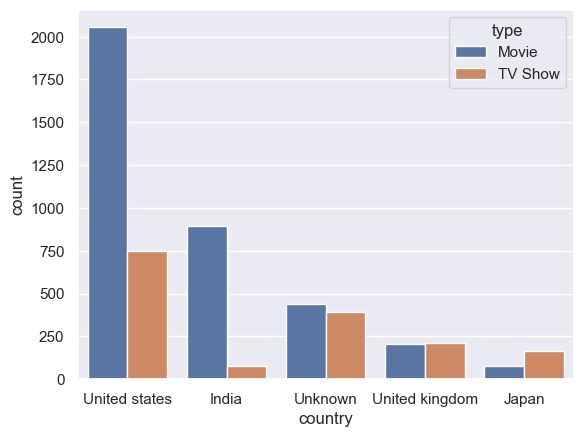

In [42]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])

In [ ]:
#In United states, Movies are more popular than TV shows.
#In India, Movies are more popular than TV shows.
#In United Kingdom, Movies and TV Show are equally popular.
#In Japan, TV Shows are more popular than Movies


<Axes: xlabel='country', ylabel='count'>

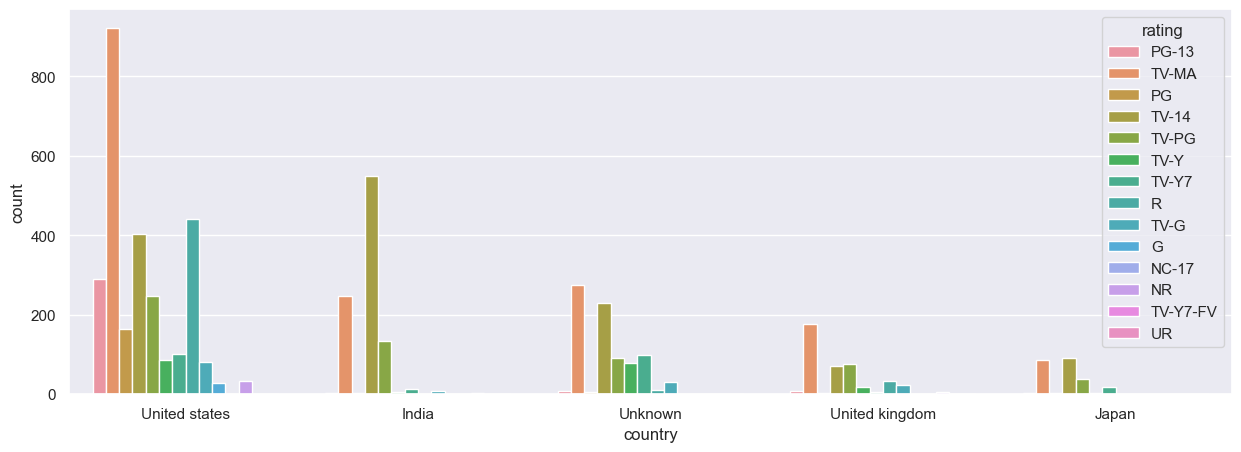

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )

Summary
•69.78% of content on Netflix consists of movies, while 30.22% are TV shows.
•'Rajiv Chilaka' has released the highest number of shows.
•A significant portion of Netflix shows originates from the USA and India.
•The highest number of shows was added in the year 2019.
•July and December stand out as the months when the highest number of shows are released.
•The most common ratings for shows on Netflix are 'TV-MA' and 'TV-14.'
•In the United States and India, movies are more popular than TV shows.
•In the United Kingdom, both movies and TV shows enjoy equal popularity.
•Conversely, in Japan, TV shows are more favored than movies.
•In the United States, most shows are rated 'TV-MA.'
•In India, the majority of shows have a 'TV-14' rating.
•The United Kingdom sees a prevalence of 'TV-MA' ratings.
•Finally, in Japan, the common rating for most shows is 'TV-14.